In [1]:
import pandas as pd
import numpy as np
import tabulate

## CARGA DE DATOS

In [2]:
df = pd.read_csv('listings.csv')
df.shape

(27051, 79)

In [3]:
df.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,bathrooms,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,2.705100e+04,2.705100e+04,2.705100e+04,27045.000000,27045.000000,0.0,27051.000000,27051.000000,27051.000000,23555.000000,...,23649.000000,23649.000000,23649.000000,23649.000000,0.0,27051.000000,27051.000000,27051.000000,27051.000000,23650.000000
mean,7.003556e+17,2.025093e+13,2.429439e+08,24.604807,33.771640,NaN,19.405490,-99.165385,3.339285,1.451709,...,4.836728,4.825281,4.841777,4.714353,NaN,14.559868,11.351188,2.906547,0.263613,1.854855
std,5.702714e+17,0.000000e+00,2.062579e+08,81.409257,116.146348,NaN,0.042390,0.033535,2.344365,1.033341,...,0.325204,0.355912,0.297361,0.391793,NaN,31.892178,31.169010,8.139586,2.250202,2.281154
min,3.579700e+04,2.025093e+13,7.365000e+03,1.000000,1.000000,NaN,19.177848,-99.339630,1.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,NaN,1.000000,0.000000,0.000000,0.000000,0.010000
25%,4.410472e+07,2.025093e+13,5.621443e+07,1.000000,2.000000,NaN,19.392489,-99.178499,2.000000,1.000000,...,4.820000,4.810000,4.810000,4.670000,NaN,1.000000,0.000000,0.000000,0.000000,0.450000
50%,8.307368e+17,2.025093e+13,1.766835e+08,4.000000,6.000000,NaN,19.415390,-99.167100,2.000000,1.000000,...,4.920000,4.920000,4.920000,4.800000,NaN,3.000000,1.000000,0.000000,0.000000,1.260000
75%,1.217382e+18,2.025093e+13,4.288830e+08,15.000000,18.000000,NaN,19.432015,-99.153731,4.000000,2.000000,...,5.000000,5.000000,5.000000,4.910000,NaN,11.000000,6.000000,2.000000,0.000000,2.620000
max,1.518561e+18,2.025093e+13,7.208445e+08,989.000000,1196.000000,NaN,19.561010,-98.963360,16.000000,49.000000,...,5.000000,5.000000,5.000000,5.000000,NaN,221.000000,221.000000,71.000000,27.000000,119.460000


In [4]:
df.columns    

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'ca

In [5]:
df[['amenities','price']].head(10)

,amenities,price
0,"[""Garden view"", ""Resort access"", ""Washer"", ""Co...","$3,673.00"
1,"[""Piano"", ""Patio or balcony"", ""Wifi"", ""Refrige...","$18,000.00"
2,"[""Self check-in"", ""Dining table"", ""Elevator"", ...",$591.00
3,"[""Room-darkening shades"", ""Dedicated workspace...",NaN
4,"[""Private entrance"", ""Laundromat nearby"", ""Din...",NaN
5,"[""Long term stays allowed"", ""Essentials"", ""Lug...",NaN
6,"[""Pack \u2019n play/Travel crib"", ""Self check-...","$3,673.00"
7,"[""Elevator"", ""Wifi"", ""Hot water"", ""Microwave"",...",$321.00
8,"[""Laundromat nearby"", ""City skyline view"", ""He...","$1,190.00"
9,"[""Pack \u2019n play/Travel crib"", ""Dining tabl...",NaN


## INGENIERIA DE VARIABLES

In [ ]:

df['price_clean'] = df['price'].astype(str).str.replace(r'[$,]', '', regex=True)
df['price_clean'] = pd.to_numeric(df['price_clean'], errors='coerce')

df_model = df.dropna(subset=['price_clean']).copy()


def clean_amenities(text):
    if pd.isna(text): return []
    text = text.replace('[', '').replace(']', '').replace('"', '')
    return [x.strip() for x in text.split(',')]


df_model['amenities_list'] = df_model['amenities'].apply(clean_amenities)

# ¿Qué tan equipada está la casa?
df_model['amenities_count'] = df_model['amenities_list'].apply(len)


target_amenities = ['Wifi', 'Air conditioning', 'Pool', 'Kitchen', 'Parking'] ### se pueden agregar mas amenities de acuerdo a interes de usuario o agencia

for amenity in target_amenities:
    df_model[f'has_{amenity.lower().replace(" ", "_")}'] = df_model['amenities_list'].apply(
        lambda x: 1 if any(amenity.lower() in item.lower() for item in x) else 0
    )

In [7]:
df_model.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,calculated_host_listings_count_shared_rooms,reviews_per_month,price_clean,amenities_list,amenities_count,has_wifi,has_air_conditioning,has_pool,has_kitchen,has_parking
0,35797,https://www.airbnb.com/rooms/35797,20250927041820,2025-09-27,city scrape,Villa Dante,"Dentro de Villa un estudio de arte con futon, ...","Santa Fe Shopping Mall, Interlomas Park and th...",https://a0.muscache.com/pictures/f395ab78-1185...,153786,...,0,NaN,3673.0,"[Garden view, Resort access, Washer, Courtyard...",12,1,0,0,1,1
1,44616,https://www.airbnb.com/rooms/44616,20250927041820,2025-09-28,city scrape,Condesa Haus,A new concept of hosting in mexico through a b...,NaN,https://a0.muscache.com/pictures/251410/ec75fe...,196253,...,0,0.38,18000.0,"[Piano, Patio or balcony, Wifi, Refrigerator, ...",26,1,0,0,1,1
2,56074,https://www.airbnb.com/rooms/56074,20250927041820,2025-09-28,city scrape,Great space in historical San Rafael,This great apartment is located in one of the ...,Very traditional neighborhood with all service...,https://a0.muscache.com/pictures/3005118/60dac...,265650,...,0,0.48,591.0,"[Self check-in, Dining table, Elevator, Wifi, ...",28,1,0,0,1,1
6,165772,https://www.airbnb.com/rooms/165772,20250927041820,2025-09-28,city scrape,BEST 5 Bedroom HOUSE IN S. Miguel Chapultepec,Welcome to Your Home in Mexico City<br />We ha...,San Miguel Chapultepec is the best kept secret...,https://a0.muscache.com/pictures/miso/Hosting-...,790208,...,0,2.24,3673.0,"[Pack \u2019n play/Travel crib, Self check-in,...",48,1,0,0,1,1
7,171109,https://www.airbnb.com/rooms/171109,20250927041820,2025-09-28,city scrape,Cool room near WTC and Metrobus,"Stay in a private room 2 blocks away from WTC,...","Great location, feel comfortable and secure at...",https://a0.muscache.com/pictures/16040866/8b0a...,816295,...,0,0.88,321.0,"[Elevator, Wifi, Hot water, Microwave, Refrige...",24,1,0,0,1,1


In [ ]:
##### DEFINICION DE VARIABLES DISCRETAS O CONTINUAS

cols_to_exclude = ['id', 'scrape_id', 'host_id', 'listing_url', 'description', 'amenities', 'name', 'picture_url']
analysis_cols = [c for c in df_model.columns if c not in cols_to_exclude]

discrete_vars = []
continuous_vars = []

for col in analysis_cols:
    if df_model[col].dtype == 'object':
        discrete_vars.append(col)
    # Si es numérica, aplicamos la regla del umbral de 20
    else:
        if df_model[col].nunique() < 20:
            discrete_vars.append(col) 
        else:
            continuous_vars.append(col)

print(f"Variables Discretas ({len(discrete_vars)}): {discrete_vars}")
print(f"Variables Continuas ({len(continuous_vars)}): {continuous_vars}")

Variables Discretas (40): ['last_scraped', 'source', 'neighborhood_overview', 'host_url', 'host_name', 'host_since', 'host_location', 'host_about', 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood', 'host_verifications', 'host_has_profile_pic', 'host_identity_verified', 'neighbourhood', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'property_type', 'room_type', 'accommodates', 'bathrooms_text', 'price', 'calendar_updated', 'has_availability', 'calendar_last_scraped', 'first_review', 'last_review', 'license', 'instant_bookable', 'calculated_host_listings_count_shared_rooms', 'amenities_list', 'has_wifi', 'has_air_conditioning', 'has_pool', 'has_kitchen', 'has_parking']
Variables Continuas (39): ['host_listings_count', 'host_total_listings_count', 'latitude', 'longitude', 'bathrooms', 'bedrooms', 'beds', 'minimum_nights', 'maximum_nights', 'minimum_minimum_nights', 'maximum_m

In [9]:
df_model.shape

(23567, 87)

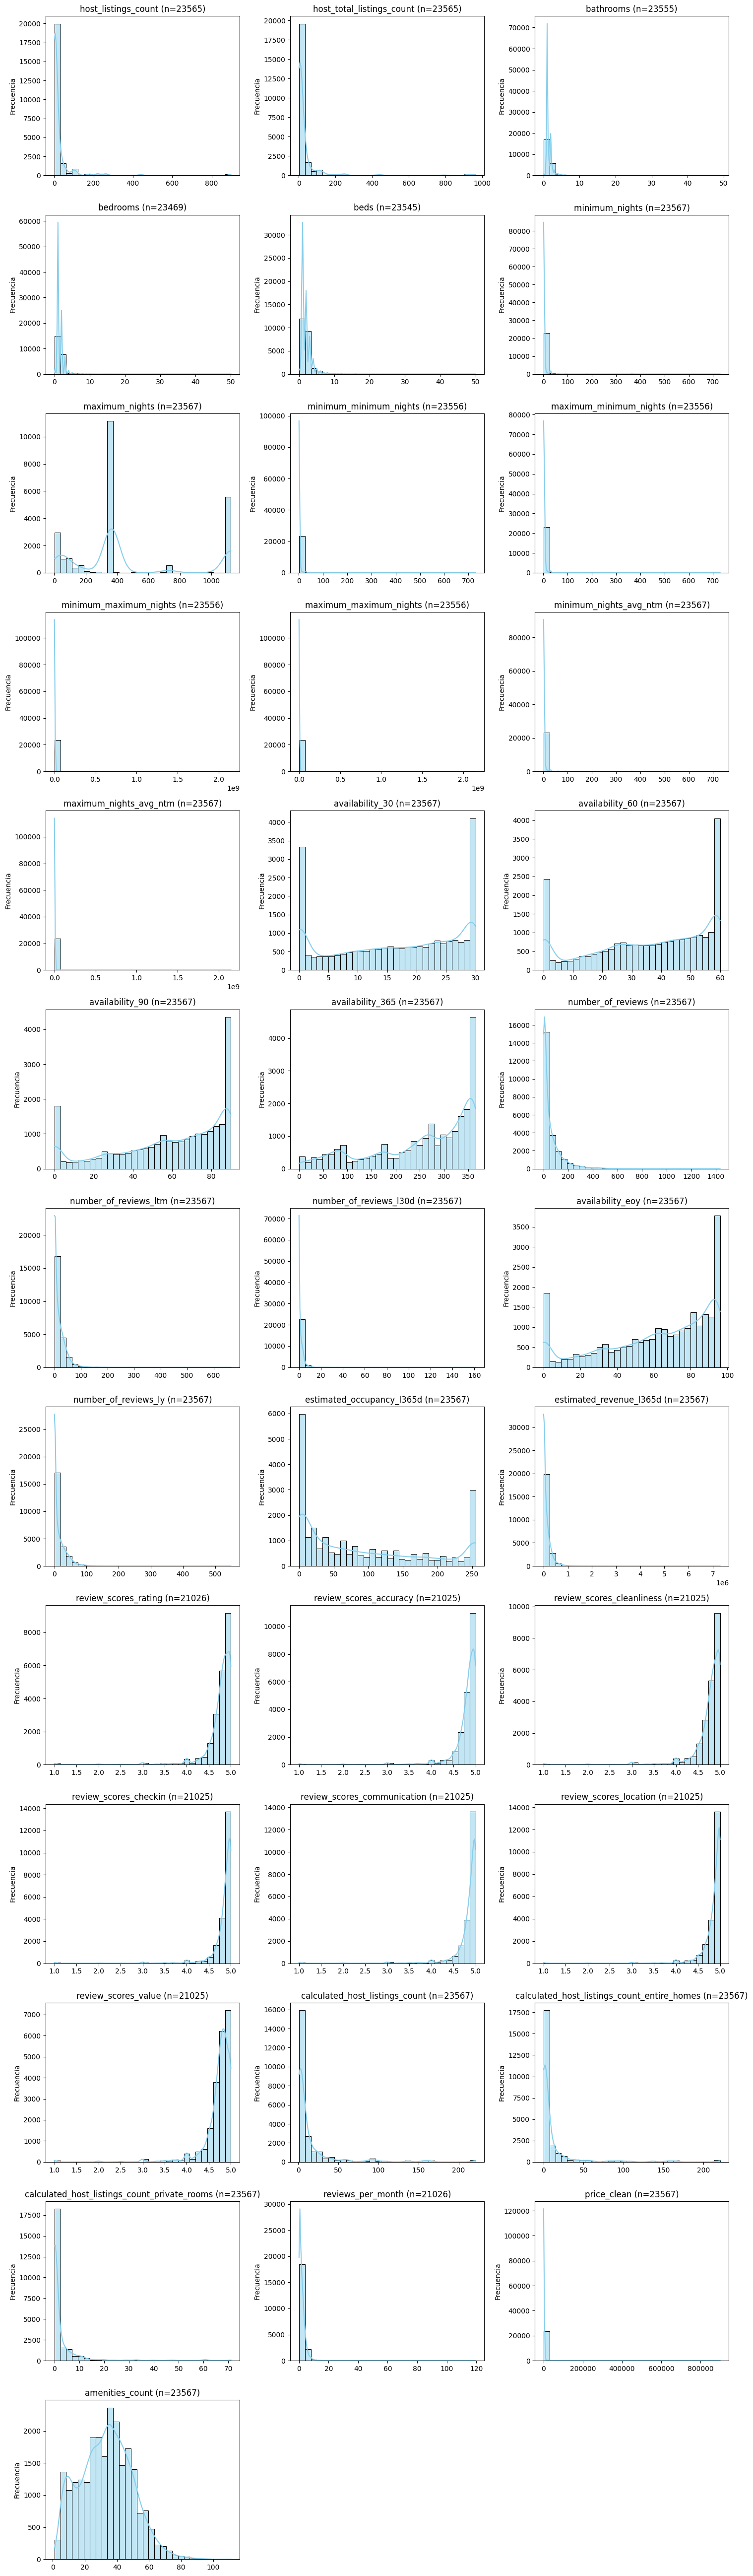

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import math


exclude = ['id', 'scrape_id', 'host_id', 'listing_url', 'description', 'amenities', 'name', 
           'picture_url', 'latitude', 'longitude'] # Lat/Lon mejor verlas en mapa
           
cols_to_plot = [c for c in df_model.select_dtypes(include=np.number).columns 
                if c not in exclude and df_model[c].nunique() > 20]


n_cols = 3  
n_vars = len(cols_to_plot)
n_rows = math.ceil(n_vars / n_cols) 

plt.figure(figsize=(15, n_rows * 4))

for i, col in enumerate(cols_to_plot):
    plt.subplot(n_rows, n_cols, i + 1)

    data_clean = df_model[col].dropna()
    
    sns.histplot(data_clean, kde=True, bins=30, color='skyblue')
    
    plt.title(f'{col} (n={len(data_clean)})')
    plt.xlabel('')
    plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.impute import SimpleImputer


# Regla de negocio: Nadie renta por más de 3 años (1100 días) en una sola reserva
cols_nights = ['minimum_nights', 'maximum_nights', 'minimum_minimum_nights', 
               'maximum_minimum_nights', 'minimum_maximum_nights']

for col in cols_nights:
    if col in df_model.columns:
        df_model.loc[df_model[col] > 1500, col] = np.nan

# ==============================================================================
# 2. IMPUTACIÓN DE NULOS
# ==============================================================================
# Usamos MEDIANA porque tus gráficas mostraron mucho sesgo.
# La media es muy sensible a los precios millonarios.

cols_with_nans = [c for c in continuous_vars if df_model[c].isnull().sum() > 0]

imputer = SimpleImputer(strategy='median')

df_model[cols_with_nans] = imputer.fit_transform(df_model[cols_with_nans])

print("Imputación completada con Mediana.")


# Aplicamos log(x+1) para evitar log(0) que es infinito negativo

vars_to_log = ['price_clean', 'number_of_reviews', 'reviews_per_month', 
               'calculated_host_listings_count', 'estimated_revenue_l365d']

for col in vars_to_log:
    if col in df_model.columns:
        df_model[f'log_{col}'] = np.log1p(df_model[col])

print("Transformación Logarítmica aplicada. Nuevas variables: log_price_clean, etc.")

#### Normalización de 'amenities_count'
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_model['amenities_count_scaled'] = scaler.fit_transform(df_model[['amenities_count']])

Imputación completada con Mediana.
Transformación Logarítmica aplicada. Nuevas variables: log_price_clean, etc.


In [ ]:

null_counts = df_model.isnull().sum()
cols_still_missing = null_counts[null_counts > 0]
print("Columnas con nulos pendientes:", cols_still_missing.index.tolist())

# Estrategia "Catch-All" (Red de seguridad)
# Para categóricas (texto) que se nos hayan pasado -> Rellenar con "Unknown"
cat_cols = df_model.select_dtypes(include=['object', 'category']).columns
df_model[cat_cols] = df_model[cat_cols].fillna('Unknown')

# Para numéricas restantes (que no eran críticas) -> Rellenar con 0 
# (Asumimos que si falta 'security_deposit' o 'cleaning_fee', es 0)
num_cols = df_model.select_dtypes(include=np.number).columns
df_model[num_cols] = df_model[num_cols].fillna(0)

print("¡Limpieza total completada! Nulos restantes:", df_model.isnull().sum().sum())

Columnas con nulos pendientes: ['description', 'neighborhood_overview', 'host_name', 'host_since', 'host_location', 'host_about', 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood', 'host_verifications', 'host_has_profile_pic', 'host_identity_verified', 'neighbourhood', 'neighbourhood_group_cleansed', 'bathrooms_text', 'calendar_updated', 'has_availability', 'first_review', 'last_review', 'license']
¡Limpieza total completada! Nulos restantes: 0


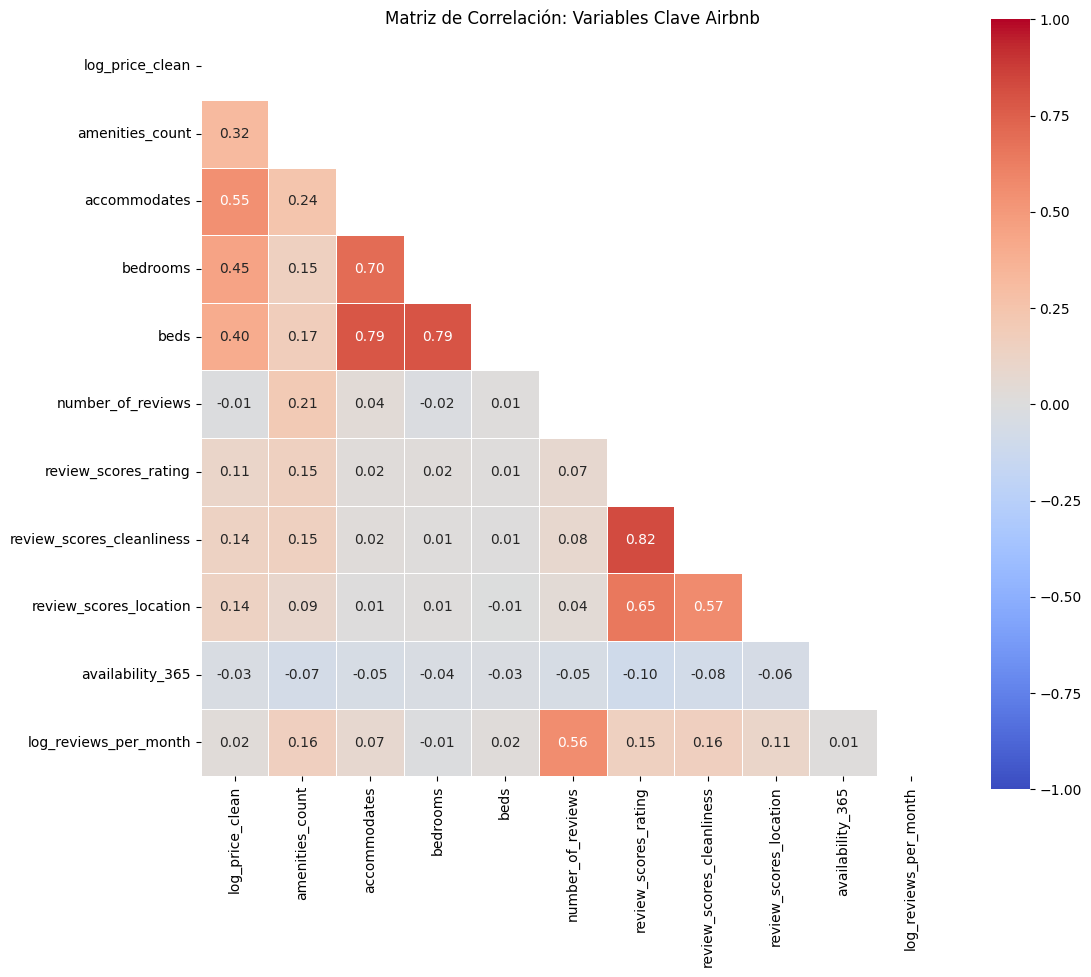

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

cols_to_correlate = [
    'log_price_clean', 'amenities_count', 'accommodates', 'bedrooms', 'beds', 
    'number_of_reviews', 'review_scores_rating', 'review_scores_cleanliness',
    'review_scores_location', 'availability_365', 'log_reviews_per_month'
]

cols_final = [c for c in cols_to_correlate if c in df_model.columns]

corr_matrix = df_model[cols_final].corr()

plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', 
            mask=mask, vmin=-1, vmax=1, center=0, square=True, linewidths=.5)

plt.title('Matriz de Correlación: Variables Clave Airbnb')
plt.show()

### MODELADO


+ Solo sirven para Regresión (Predicción de valores numéricos)


+ + Regresión Lineal: El estándar básico para predecir valores.

+ + Regresión LARS: Útil para datos con muchas dimensiones.

+ +Red Elástica (Elastic Net): Combina penalizaciones L1 y L2; buena para evitar overfitting.

+ + Regresión Lazo (Lasso): Regresión que puede llevar coeficientes a cero (selecciona variables automáticamente).

+ + Regresión de Cresta Bayesiana (Bayesian Ridge): Incluye probabilidad en la estimación de coeficientes.

+ + Regresión Bayesiana: Enfoque probabilístico general.

+ Solo sirven para Clasificación (Predicción de categorías/clases)


+ + Regresión Logística: A pesar de su nombre, es un algoritmo de clasificación (calcula la probabilidad de pertenecer a una clase).

+ + Bayes Ingenuo (Naive Bayes): Basado en probabilidad pura, muy rápido y usado en texto.

+ Sirven para Ambos (Versátiles)

+ + KNN (K-Vecinos Cercanos): Predice basándose en los datos más parecidos cercanos.

+ + Árboles de Decisión: Crea reglas de "si/entonces" para llegar a un valor o clase.

+ + Redes Neuronales (MLP): Pueden ajustarse para salida continua o categórica.

+ + Bosque Aleatorio (Random Forest): Conjunto de muchos árboles de decisión.

+ + ADABoost: Ensamble que mejora iterativamente los errores de modelos anteriores.

+ + Impulso de Árboles Gradiente (Gradient Boosting): Construye árboles secuenciales para minimizar el error.

+ + Impulso Gradiente Extremo (XGBoost): Versión optimizada y más potente del Gradient Boosting.

+ + Ensamble Votante: Puede combinar varios clasificadores (VotingClassifier) o varios regresores (VotingRegressor) para promediar sus resultados.

In [15]:
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.feature_selection import SelectKBest, f_regression, f_classif, mutual_info_regression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import Ridge
import xgboost as xgb
from sklearn.metrics import mean_squared_error, accuracy_score, classification_report
import pandas as pd
import numpy as np

# Preparación de datos (Encoding simple para que funcionen los modelos)
# Tomamos las numéricas limpias + room_type (one-hot)
df_ml = df_model.copy()
categorical_cols = ['room_type', 'neighbourhood_group_cleansed']
df_ml = pd.get_dummies(df_ml, columns=[c for c in categorical_cols if c in df_ml.columns], drop_first=True)

# Seleccionamos solo columnas numéricas resultantes para el modelado
features_base = df_ml.select_dtypes(include=[np.number]).columns.tolist()
# Excluimos columnas que son targets o IDs
exclude = ['id', 'scrape_id', 'host_id', 'price', 'price_clean', 'log_price_clean', 
           'review_scores_rating', 'log_reviews_per_month', 'reviews_per_month']
X_pool = df_ml[[c for c in features_base if c not in exclude]].fillna(0)

In [ ]:


print("--- RECONSTRUCCIÓN CONTROLADA DEL DATASET (X) ---")


exclude_patterns = ['id', 'url', 'scrape', 'name', 'description', 'picture', 'date', 'amenities']
targets_to_exclude = ['price', 'price_clean', 'log_price_clean', 
                      'review_scores_rating', 'is_great_deal', 
                      'reviews_per_month', 'log_reviews_per_month']

numeric_candidates = df_model.select_dtypes(include=[np.number]).columns.tolist()

features_numeric = [c for c in numeric_candidates 
                    if c not in targets_to_exclude 
                    and not any(pat in c for pat in exclude_patterns)]

print(f"Variables Numéricas Seleccionadas ({len(features_numeric)}):")
print(features_numeric[:5]) # Ejemplo: ['accommodates', 'bedrooms', 'amenities_count', ...]

# B) Variables Categóricas para Encoding (One-Hot)
# Solo las que tienen sentido de negocio y baja cardinalidad
features_categorical = ['room_type', 'neighbourhood_group_cleansed', 'property_type']
features_categorical = [c for c in features_categorical if c in df_model.columns]

# 2. PROCESAMIENTO Y UNIÓN
# ---------------------------------------------------------------------
# A) Parte Numérica
X_num = df_model[features_numeric].copy()
X_num = X_num.fillna(0)

# B) Parte Categórica (One-Hot Encoding)
X_cat = pd.get_dummies(df_model[features_categorical], drop_first=True)

# C) Unión Final
X_pool = pd.concat([X_num, X_cat], axis=1)

X_pool = X_pool.replace([np.inf, -np.inf], 0).fillna(0)

print("\n--- X_POOL LISTO Y LIMPIO ---")
print(f"Dimensiones Finales: {X_pool.shape}")
print(f"¿Quedan columnas tipo objeto/texto?: {len(X_pool.select_dtypes(include=['object']).columns)}")

--- RECONSTRUCCIÓN CONTROLADA DEL DATASET (X) ---
Variables Numéricas Seleccionadas (46):
['host_listings_count', 'host_total_listings_count', 'neighbourhood_group_cleansed', 'latitude', 'longitude']

--- X_POOL LISTO Y LIMPIO ---
Dimensiones Finales: (23567, 128)
¿Quedan columnas tipo objeto/texto?: 0


In [ ]:
import pandas as pd
import numpy as np
import warnings
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.feature_selection import SelectKBest, f_classif, f_regression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, r2_score
from sklearn.linear_model import (LinearRegression, LogisticRegression, Lasso, Lars, 
                                  ElasticNet, BayesianRidge, Ridge)
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.ensemble import (RandomForestClassifier, RandomForestRegressor, 
                              AdaBoostClassifier, AdaBoostRegressor, 
                              GradientBoostingClassifier, GradientBoostingRegressor, 
                              VotingClassifier, VotingRegressor)
import xgboost as xgb

warnings.filterwarnings('ignore')


X_pool = df_ml.select_dtypes(include=[np.number]).copy()

cols_to_drop = ['id', 'scrape_id', 'host_id', 'price', 'price_clean', 'log_price_clean', 
                'review_scores_rating', 'log_reviews_per_month', 'reviews_per_month']

X_pool = X_pool.drop(columns=[c for c in cols_to_drop if c in X_pool.columns], errors='ignore')
X_pool = X_pool.fillna(0)

print(f"Dataset listo para entrenar. Dimensiones: {X_pool.shape}")

# 2. DEFINICIÓN DE LA LISTA 
# --------------------------------------------------------------
def get_all_models(tipo='reg'):
    models = []
    
    # --- GRUPO 1: LINEALES Y ESTADÍSTICOS ---
    if tipo == 'reg':
        models.extend([
            ('Regresión Lineal', LinearRegression(), {}),
            ('Regresión LARS', Lars(), {'n_nonzero_coefs': [5, 10, np.inf]}),
            ('Red Elástica', ElasticNet(), {'alpha': [0.1, 1.0], 'l1_ratio': [0.2, 0.8]}),
            ('Regresión Lazo (Lasso)', Lasso(), {'alpha': [0.01, 0.1, 1.0]}),
            ('Cresta Bayesiana', BayesianRidge(), {'alpha_1': [1e-6], 'lambda_1': [1e-6]}),
            ('KNN', KNeighborsRegressor(), {'n_neighbors': [5, 10]})
        ])
    else: # Clasificación
        models.extend([
            ('Regresión Logística', LogisticRegression(max_iter=1000), {'C': [0.1, 1, 10]}),
            ('KNN', KNeighborsClassifier(), {'n_neighbors': [5, 10]}),
            ('Bayes Ingenuo', GaussianNB(), {}) 
        ])

    # --- GRUPO 2: ÁRBOLES Y REDES ---
    if tipo == 'reg':
        models.extend([
            ('Árbol de Decisión', DecisionTreeRegressor(), {'max_depth': [5, 10, 20]}),
            ('Red Neuronal (MLP)', MLPRegressor(max_iter=300), {'hidden_layer_sizes': [(50,), (100,)]})
        ])
    else:
        models.extend([
            ('Árbol de Decisión', DecisionTreeClassifier(), {'max_depth': [5, 10, 20]}),
            ('Red Neuronal (MLP)', MLPClassifier(max_iter=300), {'hidden_layer_sizes': [(50,), (100,)]})
        ])

    # --- GRUPO 3: ENSAMBLES AVANZADOS ---
    if tipo == 'reg':
        models.extend([
            ('Bosque Aleatorio', RandomForestRegressor(), {'n_estimators': [50, 100], 'max_depth': [10, None]}),
            ('ADABoost', AdaBoostRegressor(), {'n_estimators': [50, 100], 'learning_rate': [0.1]}),
            ('Impulso Arboles (GBM)', GradientBoostingRegressor(), {'n_estimators': [100], 'max_depth': [3, 5]}),
            ('XGBoost Extremo', xgb.XGBRegressor(objective='reg:squarederror'), {'n_estimators': [100], 'learning_rate': [0.1]})
        ])
        # Votante Manual
        votante = VotingRegressor(estimators=[('lr', LinearRegression()), ('rf', RandomForestRegressor(n_estimators=10))])
        models.append(('Ensamble Votante', votante, {}))
    else:
        models.extend([
            ('Bosque Aleatorio', RandomForestClassifier(), {'n_estimators': [50, 100], 'max_depth': [10, None]}),
            ('ADABoost', AdaBoostClassifier(), {'n_estimators': [50, 100], 'learning_rate': [0.1]}),
            ('Impulso Arboles (GBM)', GradientBoostingClassifier(), {'n_estimators': [100], 'max_depth': [3, 5]}),
            ('XGBoost Extremo', xgb.XGBClassifier(eval_metric='logloss', use_label_encoder=False), {'n_estimators': [100], 'learning_rate': [0.1]})
        ])
        # Votante Manual
        votante = VotingClassifier(estimators=[('lr', LogisticRegression(max_iter=200)), ('rf', RandomForestClassifier(n_estimators=10))], voting='soft')
        models.append(('Clasificador Votante', votante, {}))

    return models


def entrenar_4_estrategias_completo(X, y, lista_modelos, tipo_problema='reg'):
    reporte = []
    metric_name = 'accuracy' if tipo_problema == 'clas' else 'r2'
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    scaler = StandardScaler()
    X_train_s = scaler.fit_transform(X_train)
    X_test_s = scaler.transform(X_test)
    feat_names_full = X.columns.tolist()
    
    # Selección Estadística (Top 10)
    k_best = min(10, X_train.shape[1])
    selector_func = f_classif if tipo_problema == 'clas' else f_regression
    selector = SelectKBest(selector_func, k=k_best)
    X_train_sel = selector.fit_transform(X_train_s, y_train)
    X_test_sel = selector.transform(X_test_s)
    
    mask = selector.get_support()
    feat_names_sel = [feat_names_full[i] for i, x in enumerate(mask) if x]

    for nombre, modelo_base, params in lista_modelos:
        estrategias = [
            ('Todas las vars', 'Randomized', X_train_s, X_test_s, feat_names_full),
            ('Todas las vars', 'Grid',       X_train_s, X_test_s, feat_names_full),
            ('Selección Est.', 'Randomized', X_train_sel, X_test_sel, feat_names_sel),
            ('Selección Est.', 'Grid',       X_train_sel, X_test_sel, feat_names_sel)
        ]
        
        for data_desc, search_type, X_tr, X_te, f_names in estrategias:
            try:
                if search_type == 'Grid':
                    search = GridSearchCV(modelo_base, params, cv=2, scoring=metric_name, n_jobs=-1)
                else:
                    search = RandomizedSearchCV(modelo_base, params, n_iter=3, cv=2, scoring=metric_name, random_state=42, n_jobs=-1)
                
                search.fit(X_tr, y_train)
                best_model = search.best_estimator_
                
                score_train = best_model.score(X_tr, y_train)
                score_test = best_model.score(X_te, y_test)
                
                diff = score_train - score_test
                estado = "Óptimo"
                if score_train > 0.95 and score_test < 0.6: estado = "Overfitting Severo"
                elif diff > 0.15: estado = "Overfitting Moderado"
                elif score_test < 0.2: estado = "Underfitting"

                top_vars = "N/A"
                if hasattr(best_model, 'feature_importances_'):
                    idxs = np.argsort(best_model.feature_importances_)[::-1][:5]
                    top_vars = [f_names[i] for i in idxs]
                elif hasattr(best_model, 'coef_'):
                    coefs = np.abs(best_model.coef_)
                    if coefs.ndim > 1: coefs = coefs[0]
                    idxs = np.argsort(coefs)[::-1][:5]
                    top_vars = [f_names[i] for i in idxs]

                reporte.append({
                    'Modelo': nombre,
                    'Variables': data_desc,
                    'Estrategia': search_type,
                    'Train Score': round(score_train, 4),
                    'Test Score': round(score_test, 4),
                    'Estado': estado,
                    'Top 5 Variables': top_vars,
                    'Mejores Params': str(search.best_params_)
                })
            except Exception as e:
                pass # Ignorar fallos puntuales (ej. LARS sin convergencia)

    return pd.DataFrame(reporte)

Dataset listo para entrenar. Dimensiones: (23567, 49)


#### ENFOQUE 1 (USUARIO)

Predecir si una estancia será "Excelente" (Alta calificación + Limpia). Target: Binario (1 si Rating > 4.8, 0 si no). Técnica Estadística: ANOVA (f_classif) para ver qué variables separan mejor las clases.

In [ ]:
print("=== ENTRENANDO ENFOQUE USUARIO (Clasificación) ===")
# Target: Buena experiencia (> 4.8)
y_user = (df_model['review_scores_rating'] > 4.8).astype(int)

modelos_clas = get_all_models('clas')
df_user = entrenar_4_estrategias_completo(X_pool, y_user, modelos_clas, 'clas')

cols_show = ['Modelo', 'Variables', 'Estrategia', 'Train Score', 'Test Score', 'Estado', 'Top 5 Variables']
print(df_user.sort_values(by='Test Score', ascending=False)[cols_show].to_markdown(index=False))

=== ENTRENANDO ENFOQUE USUARIO (Clasificación) ===
| Modelo                | Variables      | Estrategia   |   Train Score |   Test Score | Estado   | Top 5 Variables                                                                                                                        |
|:----------------------|:---------------|:-------------|--------------:|-------------:|:---------|:---------------------------------------------------------------------------------------------------------------------------------------|
| Red Neuronal (MLP)    | Selección Est. | Grid         |        0.9042 |       0.8916 | Óptimo   | N/A                                                                                                                                    |
| Bosque Aleatorio      | Todas las vars | Grid         |        0.9448 |       0.8893 | Óptimo   | ['review_scores_accuracy', 'review_scores_value', 'review_scores_communication', 'review_scores_cleanliness', 'review_scores_checkin'] |
|

#### ENFOQUE 2 PROVEEDOR (Regresión)
Objetivo: Predecir el precio de mercado (log_price_clean). Target: Continuo. Técnica Estadística: f_regression (Correlación lineal) para filtrar ruido.

In [ ]:
print("\n=== ENTRENANDO ENFOQUE PROVEEDOR (Regresión Precio) ===")
# Target: Log Precio
y_prov = df_model['log_price_clean']

mask = y_prov.notna()
X_prov_safe = X_pool.loc[mask]
y_prov_safe = y_prov.loc[mask]

modelos_reg = get_all_models('reg')
df_prov = entrenar_4_estrategias_completo(X_prov_safe, y_prov_safe, modelos_reg, 'reg')

print(df_prov.sort_values(by='Test Score', ascending=False)[cols_show].to_markdown(index=False))


=== ENTRENANDO ENFOQUE PROVEEDOR (Regresión Precio) ===
| Modelo                 | Variables      | Estrategia   |   Train Score |   Test Score | Estado               | Top 5 Variables                                                                                                                                                                       |
|:-----------------------|:---------------|:-------------|--------------:|-------------:|:---------------------|:--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| XGBoost Extremo        | Todas las vars | Grid         |        0.8972 |       0.8485 | Óptimo               | ['bedrooms', 'accommodates', 'has_air_conditioning', 'bathrooms', 'has_kitchen']                                                                                                      |
| XGBoost Extremo        | Todas las vars | Randomiz

#### ENFOQUE TRES AGENCIA (Popularidad/Viralidad)
Objetivo: Identificar qué hace que un anuncio sea popular (reciba muchas visitas/reviews). Target: log_reviews_per_month (Proxy de demanda). Técnica Estadística: mutual_info_regression. A diferencia de la correlación lineal, esta detecta relaciones no lineales (ej. tal vez el precio medio es popular, pero el muy bajo o muy alto no).

In [ ]:
print("\n=== ENTRENANDO ENFOQUE AGENCIA (Regresión Demanda) ===")
# Target: Reviews mensuales (proxy de popularidad)
y_agency = df_model['log_reviews_per_month'].fillna(0)

df_agency = entrenar_4_estrategias_completo(X_pool, y_agency, modelos_reg, 'reg')

print(df_agency.sort_values(by='Test Score', ascending=False)[cols_show].to_markdown(index=False))


=== ENTRENANDO ENFOQUE AGENCIA (Regresión Demanda) ===
| Modelo                 | Variables      | Estrategia   |   Train Score |   Test Score | Estado   | Top 5 Variables                                                                                                                               |
|:-----------------------|:---------------|:-------------|--------------:|-------------:|:---------|:----------------------------------------------------------------------------------------------------------------------------------------------|
| XGBoost Extremo        | Todas las vars | Grid         |        0.9502 |       0.928  | Óptimo   | ['number_of_reviews_ltm', 'number_of_reviews_l30d', 'number_of_reviews_ly', 'number_of_reviews', 'minimum_minimum_nights']                    |
| XGBoost Extremo        | Todas las vars | Randomized   |        0.9502 |       0.928  | Óptimo   | ['number_of_reviews_ltm', 'number_of_reviews_l30d', 'number_of_reviews_ly', 'number_of_reviews', 'minimum_mi

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import ast
from sklearn.metrics import confusion_matrix, roc_curve, auc
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.linear_model import LogisticRegression, LinearRegression, Lasso, Ridge, ElasticNet, BayesianRidge
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingClassifier, GradientBoostingRegressor, AdaBoostClassifier, AdaBoostRegressor, VotingClassifier, VotingRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
import xgboost as xgb
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif, f_regression
from sklearn.model_selection import train_test_split


def draw_neural_net(ax, left, right, bottom, top, layer_sizes):
    """
    Dibuja una representación visual de la red neuronal usando Matplotlib.
    """
    v_spacing = (top - bottom)/float(max(layer_sizes))
    h_spacing = (right - left)/float(len(layer_sizes) - 1)
    
    # Nodos
    for n, layer_size in enumerate(layer_sizes):
        layer_top = v_spacing*(layer_size - 1)/2. + (top + bottom)/2.
        for m in range(layer_size):
            circle = plt.Circle((n*h_spacing + left, layer_top - m*v_spacing), v_spacing/4.,
                                color='w', ec='k', zorder=4)
            ax.add_artist(circle)
            
            if m == 0:
                if n == 0: label = "Input\nLayer"
                elif n == len(layer_sizes)-1: label = "Output\nLayer"
                else: label = f"Hidden\n{n}"
                ax.text(n*h_spacing + left, layer_top + v_spacing, label, ha='center')

    for n, (layer_size_a, layer_size_b) in enumerate(zip(layer_sizes[:-1], layer_sizes[1:])):
        layer_top_a = v_spacing*(layer_size_a - 1)/2. + (top + bottom)/2.
        layer_top_b = v_spacing*(layer_size_b - 1)/2. + (top + bottom)/2.
        for m in range(layer_size_a):
            for o in range(layer_size_b):
                if layer_size_a > 20 and np.random.rand() > 0.1: continue 
                line = plt.Line2D([n*h_spacing + left, (n + 1)*h_spacing + left],
                                  [layer_top_a - m*v_spacing, layer_top_b - o*v_spacing], c='k', alpha=0.1)
                ax.add_artist(line)

def analizar_detalles_modelo(model, feature_names, model_name, ax=None):
    """
    Extrae y grafica coeficientes, importancias o pesos según el tipo de modelo.
    """
    # CASO A: RED NEURONAL (MLP)
    if isinstance(model, (MLPClassifier, MLPRegressor)):
        print(f"   -> Inspeccionando Red Neuronal: {model.hidden_layer_sizes}")
        
        # 1. Graficar la Curva de Pérdida (Aprendizaje)
        if ax:
            ax.plot(model.loss_curve_)
            ax.set_title(f'Curva de Aprendizaje (Loss)\n{model_name}')
            ax.set_xlabel('Iteraciones')
            ax.set_ylabel('Loss')
            ax.grid(True)
        
        return "MLP"

    # CASO B: MODELOS BASADOS EN ÁRBOLES (Feature Importance)
    elif hasattr(model, 'feature_importances_'):
        importances = model.feature_importances_
        indices = np.argsort(importances)[::-1][:10] # Top 10
        
        if ax:
            sns.barplot(x=importances[indices], y=[feature_names[i] for i in indices], ax=ax, palette='viridis')
            ax.set_title(f'Top 10 Variables Importantes\n({model_name})')
            ax.set_xlabel('Importancia Relativa')
            
    # CASO C: MODELOS LINEALES (Coeficientes)
    elif hasattr(model, 'coef_'):
        coefs = model.coef_
        if coefs.ndim > 1: coefs = coefs[0] # Manejo de matrices
        
        # Ordenar por magnitud absoluta
        indices = np.argsort(np.abs(coefs))[::-1][:10]
        
        if ax:
            sns.barplot(x=coefs[indices], y=[feature_names[i] for i in indices], ax=ax, palette='coolwarm')
            ax.set_title(f'Top 10 Coeficientes (Impacto)\n({model_name})')
            ax.set_xlabel('Peso del Coeficiente (+/-)')
            ax.axvline(0, color='k', linestyle='--')

    # CASO D: KNN (No tiene parámetros internos visualizables fácilmente)
    else:
        if ax:
            ax.text(0.5, 0.5, "Este modelo (KNN/Votante)\nno tiene coeficientes internos.", 
                    ha='center', va='center')
            ax.axis('off')
    
    return "Generic"

def visualizar_modelo_ganador_detallado(df_resultados, X, y, tipo_problema='reg'):
    
    winner_row = df_resultados.sort_values(by='Test Score', ascending=False).iloc[0]
    nombre_modelo = winner_row['Modelo']
    estrategia_vars = winner_row['Variables']
    params_str = winner_row['Mejores Params']
    
    print(f"★ GANADOR: {nombre_modelo}")
    print(f"★ CONFIG: {estrategia_vars} | PARAMS: {params_str}")
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    scaler = StandardScaler()
    X_train_s = scaler.fit_transform(X_train)
    X_test_s = scaler.transform(X_test)
    feat_names = X.columns.tolist()

    if 'Selección' in estrategia_vars:
        k_best = min(10, X_train.shape[1])
        f_func = f_classif if tipo_problema == 'clas' else f_regression
        selector = SelectKBest(f_func, k=k_best)
        X_train_final = selector.fit_transform(X_train_s, y_train)
        X_test_final = selector.transform(X_test_s)
        mask = selector.get_support()
        feat_names = [feat_names[i] for i, x in enumerate(mask) if x]
    else:
        X_train_final = X_train_s
        X_test_final = X_test_s


    model_class = None
    if 'Logística' in nombre_modelo: model = LogisticRegression(**ast.literal_eval(params_str))
    elif 'Bosque' in nombre_modelo: model = RandomForestRegressor(**ast.literal_eval(params_str)) if tipo_problema=='reg' else RandomForestClassifier(**ast.literal_eval(params_str))
    elif 'XGB' in nombre_modelo: model = xgb.XGBRegressor(**ast.literal_eval(params_str)) if tipo_problema=='reg' else xgb.XGBClassifier(**ast.literal_eval(params_str))
    elif 'Neuronal' in nombre_modelo or 'MLP' in nombre_modelo: 
        model = MLPRegressor(**ast.literal_eval(params_str)) if tipo_problema=='reg' else MLPClassifier(**ast.literal_eval(params_str))
    elif 'Lasso' in nombre_modelo: model = Lasso(**ast.literal_eval(params_str))
    elif 'Lineal' in nombre_modelo: model = LinearRegression()
    elif 'KNN' in nombre_modelo: model = KNeighborsRegressor(**ast.literal_eval(params_str)) if tipo_problema=='reg' else KNeighborsClassifier(**ast.literal_eval(params_str))
    else: 
        print(f"Modelo {nombre_modelo} no mapeado explícitamente en esta celda demo. Usando RF por defecto.")
        model = RandomForestRegressor() if tipo_problema=='reg' else RandomForestClassifier()

    model.fit(X_train_final, y_train)
    y_pred = model.predict(X_test_final)

    fig = plt.figure(figsize=(18, 5))
    
    ax1 = plt.subplot(1, 3, 1)
    if tipo_problema == 'clas':
        cm = confusion_matrix(y_test, y_pred)
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax1)
        ax1.set_title('Rendimiento: Matriz Confusión')
    else:
        ax1.scatter(y_test, y_pred, alpha=0.5, color='teal')
        min_v, max_v = min(y_test.min(), y_pred.min()), max(y_test.max(), y_pred.max())
        ax1.plot([min_v, max_v], [min_v, max_v], 'r--')
        ax1.set_title('Rendimiento: Real vs Predicho')

    ax2 = plt.subplot(1, 3, 2)
    model_type = analizar_detalles_modelo(model, feat_names, nombre_modelo, ax=ax2)

    ax3 = plt.subplot(1, 3, 3)
    
    if model_type == "MLP":
        ax3.axis('off')

        n_inputs = min(len(feat_names), 10) 
        n_hidden = list(model.hidden_layer_sizes)
        n_hidden_viz = [min(h, 10) for h in n_hidden]
        n_output = 1
        
        layer_sizes = [n_inputs] + n_hidden_viz + [n_output]
        draw_neural_net(ax3, .1, .9, .1, .9, layer_sizes)
        ax3.set_title(f'Arquitectura de la Red\n(Simplificada: {len(feat_names)} in -> {n_hidden} -> 1 out)')
        
    else:
        # SI ES OTRO MODELO -> DIBUJAR ERROR/ROC
        if tipo_problema == 'clas':
            if hasattr(model, "predict_proba"):
                y_prob = model.predict_proba(X_test_final)[:, 1]
                fpr, tpr, _ = roc_curve(y_test, y_prob)
                ax3.plot(fpr, tpr, color='orange', lw=2)
                ax3.plot([0, 1], [0, 1], 'k--')
                ax3.set_title('Curva ROC')
            else:
                ax3.text(0.5,0.5,"Sin curva ROC")
        else:
            residuals = y_test - y_pred
            sns.histplot(residuals, kde=True, ax=ax3, color='salmon')
            ax3.set_title('Distribución de Errores')

    plt.tight_layout()
    plt.show()

    # Si es MLP, imprimir detalle extra de pesos
    if isinstance(model, (MLPClassifier, MLPRegressor)):
        print("\n--- DETALLE DE PESOS (RED NEURONAL) ---")
        print(f"Capa Entrada ({model.coefs_[0].shape[0]} neuronas) -> Capa Oculta 1 ({model.coefs_[0].shape[1]} neuronas)")
        print(f"Ejemplo de pesos primeros 5 inputs:\n{model.coefs_[0][:5, :3]} ...")

 VISUALIZACIÓN DETALLADA: GANADOR ENFOQUE USUARIO
★ GANADOR: Red Neuronal (MLP)
★ CONFIG: Selección Est. | PARAMS: {'hidden_layer_sizes': (50,)}
   -> Inspeccionando Red Neuronal: (50,)


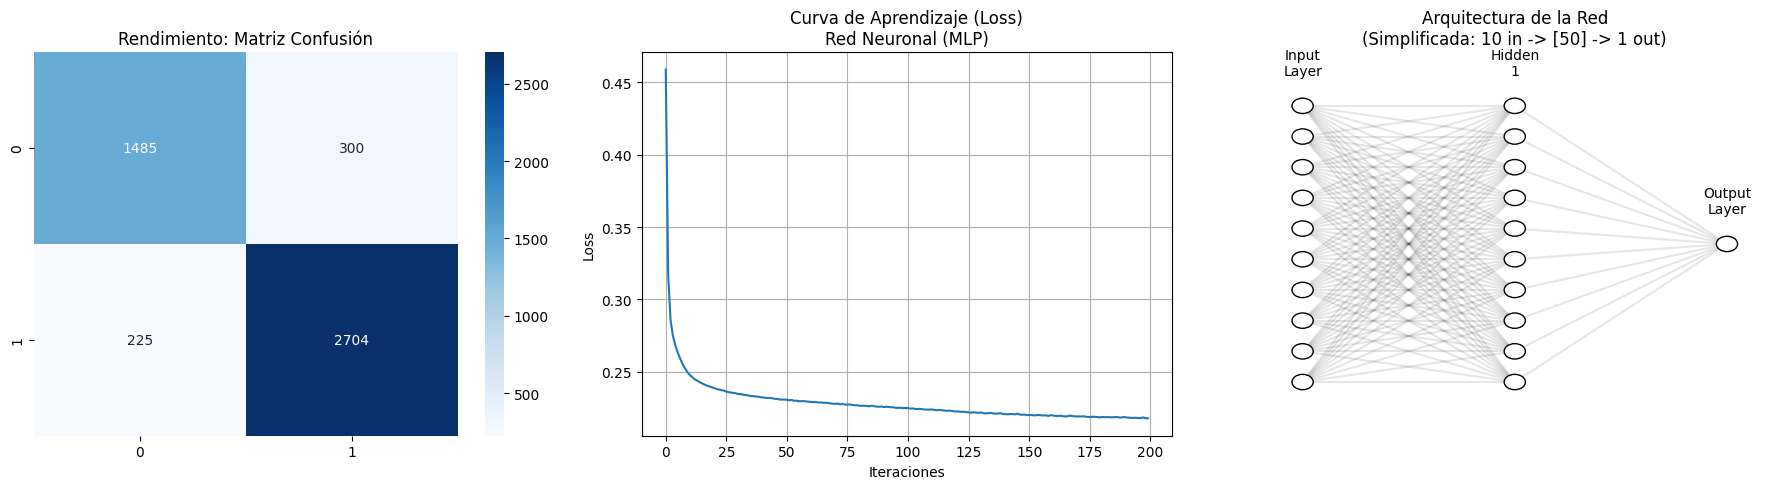


--- DETALLE DE PESOS (RED NEURONAL) ---
Capa Entrada (10 neuronas) -> Capa Oculta 1 (50 neuronas)
Ejemplo de pesos primeros 5 inputs:
[[ 0.63093729  0.21285164  0.73492478]
 [ 0.27952489  0.31295669  0.32435088]
 [ 0.17609909 -0.20292655 -0.46174951]
 [ 1.08552169  0.0131126   0.40850028]
 [-0.4157475   0.49673501  0.02241584]] ...


In [ ]:
print("=========================================================")
print(" VISUALIZACIÓN DETALLADA: GANADOR ENFOQUE USUARIO")
print("=========================================================")

y_user = (df_model['review_scores_rating'] > 4.8).astype(int)


visualizar_modelo_ganador_detallado(df_user, X_pool, y_user, tipo_problema='clas')

 VISUALIZACIÓN DETALLADA: GANADOR ENFOQUE PROVEEDOR
★ GANADOR: XGBoost Extremo
★ CONFIG: Todas las vars | PARAMS: {'learning_rate': 0.1, 'n_estimators': 100}


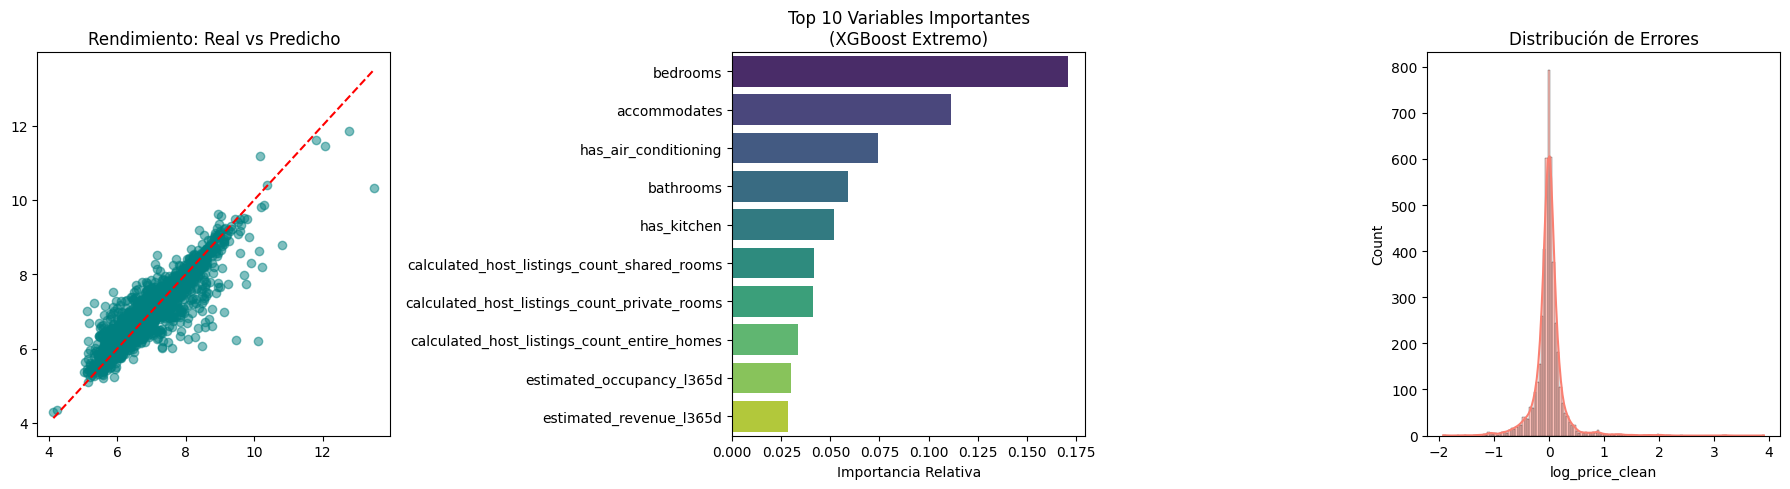

In [ ]:
print("=========================================================")
print(" VISUALIZACIÓN DETALLADA: GANADOR ENFOQUE PROVEEDOR")
print("=========================================================")

# 1. Reconstruir el Target y filtrar Nulos (Precio)
mask_prov = df_model['log_price_clean'].notna()
X_prov_safe = X_pool.loc[mask_prov]
y_prov_safe = df_model.loc[mask_prov, 'log_price_clean']


visualizar_modelo_ganador_detallado(df_prov, X_prov_safe, y_prov_safe, tipo_problema='reg')

 VISUALIZACIÓN DETALLADA: GANADOR ENFOQUE AGENCIA
★ GANADOR: XGBoost Extremo
★ CONFIG: Todas las vars | PARAMS: {'learning_rate': 0.1, 'n_estimators': 100}


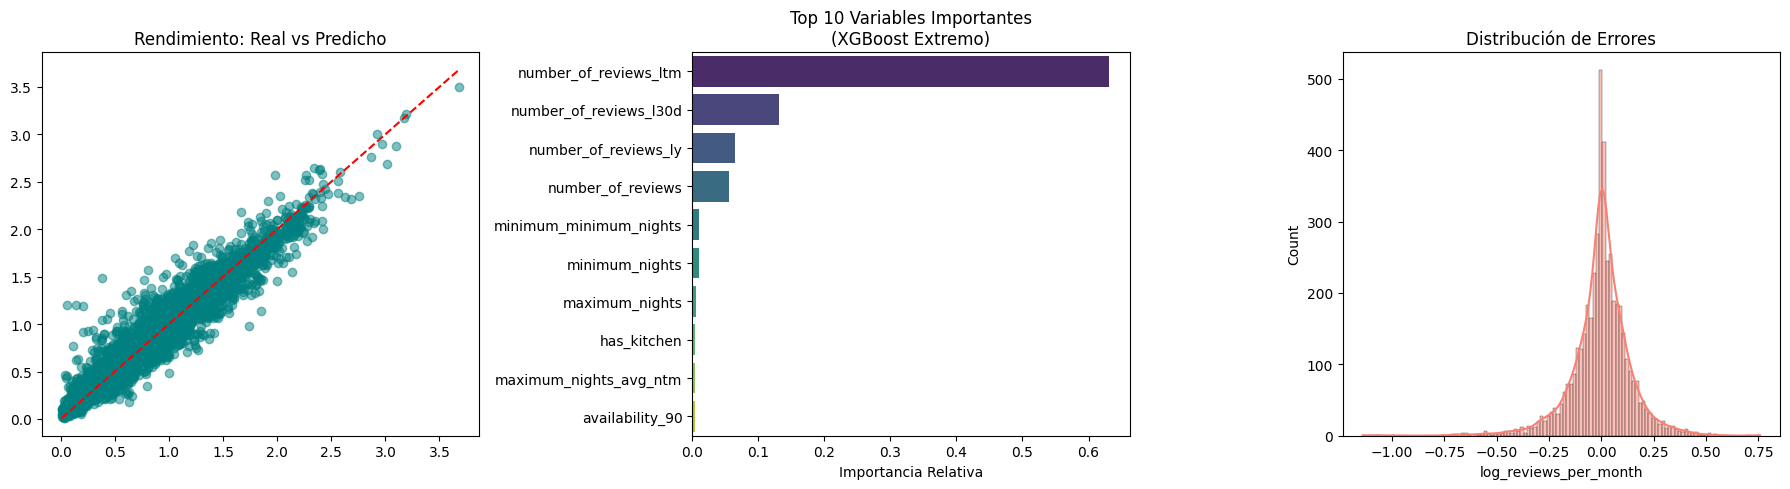

In [ ]:
print("=========================================================")
print(" VISUALIZACIÓN DETALLADA: GANADOR ENFOQUE AGENCIA")
print("=========================================================")

# 1. Reconstruir el Target (Reviews por mes)
y_agency = df_model['log_reviews_per_month'].fillna(0)

visualizar_modelo_ganador_detallado(df_agency, X_pool, y_agency, tipo_problema='reg')

#### TRATAMIENDO DE DATA LEAKAGE

In [ ]:
print("\n=========================================================")
print("  ENFOQUE USUARIO: PREDICCIÓN DE EXPERIENCIA")
print("=========================================================")


cols_ban_user = [
    'estimated_revenue_l365d',
    'estimated_occupancy_l365d',
    'availability_30', 
    'availability_60',
    'availability_90',
    'availability_365' # Al usuario no le importa si está libre todo el año, solo sus fechas
]

cols_drop_user = [c for c in cols_ban_user if c in X_pool.columns]

X_user_pure = X_pool.drop(columns=cols_drop_user, errors='ignore')

y_user = (df_model['review_scores_rating'] > 4.8).astype(int)

print(f"Variables eliminadas: {len(cols_drop_user)}")
print(f"Dimensiones de entrenamiento: {X_user_pure.shape}")

modelos_clas = get_all_models('clas')
df_user_pure = entrenar_4_estrategias_completo(X_user_pure, y_user, modelos_clas, 'clas')

print("\n>>> RANKING FINAL USUARIO")
print(df_user_pure.sort_values(by='Test Score', ascending=False)[cols_show].to_markdown(index=False))


  ENFOQUE USUARIO: PREDICCIÓN DE EXPERIENCIA
Variables eliminadas: 6
Dimensiones de entrenamiento: (23567, 43)

>>> RANKING FINAL USUARIO
| Modelo                | Variables      | Estrategia   |   Train Score |   Test Score | Estado   | Top 5 Variables                                                                                                                        |
|:----------------------|:---------------|:-------------|--------------:|-------------:|:---------|:---------------------------------------------------------------------------------------------------------------------------------------|
| Clasificador Votante  | Selección Est. | Grid         |        0.9557 |       0.8897 | Óptimo   | N/A                                                                                                                                    |
| Red Neuronal (MLP)    | Selección Est. | Randomized   |        0.9038 |       0.8897 | Óptimo   | N/A                                               

In [ ]:
print("\n=========================================================")
print("  ENFOQUE PROVEEDOR: ESCENARIO HOST NUEVO")
print("=========================================================")

# Un host nuevo no tiene reseñas ni ingresos históricos
cols_ban_prov = [
    'estimated_revenue_l365d',
    'estimated_occupancy_l365d',
    'number_of_reviews', 
    'number_of_reviews_ltm', 
    'number_of_reviews_l30d',
    'reviews_per_month',
    'first_review', 'last_review',
    'calculated_host_listings_count',
    'log_estimated_revenue_l365d'
]

cols_drop_prov = [c for c in cols_ban_prov if c in X_pool.columns]

X_prov_pure = X_pool.drop(columns=cols_drop_prov, errors='ignore')

y_prov = df_model['log_price_clean']
mask = y_prov.notna()
X_prov_pure = X_prov_pure.loc[mask]
y_prov = y_prov.loc[mask]

print(f"Variables eliminadas: {len(cols_drop_prov)}")
print(f"Dimensiones de entrenamiento: {X_prov_pure.shape}")

modelos_reg = get_all_models('reg')
df_prov_pure = entrenar_4_estrategias_completo(X_prov_pure, y_prov, modelos_reg, 'reg')

print("\n>>> RANKING FINAL PROVEEDOR (Host Nuevo)")
print(df_prov_pure.sort_values(by='Test Score', ascending=False)[cols_show].to_markdown(index=False))


  ENFOQUE PROVEEDOR: ESCENARIO HOST NUEVO
Variables eliminadas: 7
Dimensiones de entrenamiento: (23567, 42)

>>> RANKING FINAL PROVEEDOR (Host Nuevo)
| Modelo                 | Variables      | Estrategia   |   Train Score |   Test Score | Estado               | Top 5 Variables                                                                                                   |
|:-----------------------|:---------------|:-------------|--------------:|-------------:|:---------------------|:------------------------------------------------------------------------------------------------------------------|
| Bosque Aleatorio       | Todas las vars | Grid         |        0.9593 |       0.721  | Overfitting Moderado | ['bedrooms', 'accommodates', 'bathrooms', 'longitude', 'latitude']                                                |
| Bosque Aleatorio       | Todas las vars | Randomized   |        0.9589 |       0.7204 | Overfitting Moderado | ['bedrooms', 'accommodates', 'bathrooms', 'longit

=== FASE 2: ENFOQUE AGENCIA (Saneamiento Profundo de Leakage) ===
Detectadas 14 variables de LEAKAGE a eliminar.
Ejemplos: ['number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d', 'number_of_reviews_ly', 'estimated_occupancy_l365d']
Dimensiones Finales X (Inputs Puros): (23567, 35)

>>> Iniciando entrenamiento de 4 escenarios (Grid/Random x Full/Select)...

=== RANKING DE MODELOS (SIN LEAKAGE) ===
| Modelo                 | Variables      | Estrategia   |   Train Score |   Test Score | Estado               | Top 5 Variables                                                                                                                                                             |
|:-----------------------|:---------------|:-------------|--------------:|-------------:|:---------------------|:----------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| Bosque 

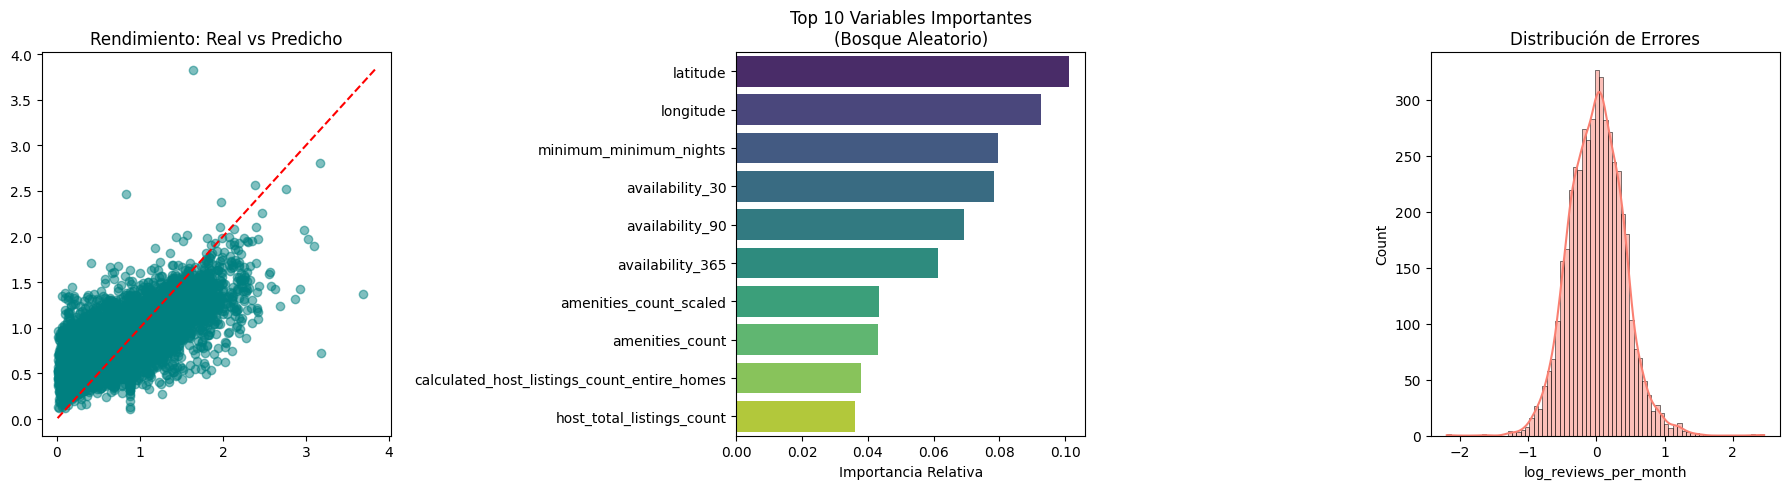

In [ ]:

print("=== FASE 2: ENFOQUE AGENCIA (Saneamiento Profundo de Leakage) ===")


leakage_keywords = [
    'review',      # Elimina number_of_reviews, reviews_per_month, review_scores...
    'occupancy',   # Elimina estimated_occupancy
    'revenue',     # Elimina estimated_revenue
    'scraped'      # Elimina fechas de scrapeo irrelevantes
]

cols_to_ban = [c for c in X_pool.columns if any(keyword in c for keyword in leakage_keywords)]

print(f"Detectadas {len(cols_to_ban)} variables de LEAKAGE a eliminar.")
print(f"Ejemplos: {cols_to_ban[:5]}")


X_agency_pure = X_pool.drop(columns=cols_to_ban, errors='ignore')

target_col = 'log_reviews_per_month'
if target_col in X_agency_pure.columns:
    X_agency_pure = X_agency_pure.drop(columns=[target_col])

print(f"Dimensiones Finales X (Inputs Puros): {X_agency_pure.shape}")

y_agency = df_model['log_reviews_per_month'].fillna(0)

modelos_reg = get_all_models('reg')

print("\n>>> Iniciando entrenamiento de 4 escenarios (Grid/Random x Full/Select)...")
df_agency_pure = entrenar_4_estrategias_completo(X_agency_pure, y_agency, modelos_reg, 'reg')

cols_show = ['Modelo', 'Variables', 'Estrategia', 'Train Score', 'Test Score', 'Estado', 'Top 5 Variables']
print("\n=== RANKING DE MODELOS (SIN LEAKAGE) ===")
print(df_agency_pure.sort_values(by='Test Score', ascending=False)[cols_show].to_markdown(index=False))


  VISUALIZACIÓN PERSONALIZADA DE MODELOS SELECCIONADOS

>>> 1. USUARIO: Visualizando MLP (Preferencia Manual)
★ GANADOR: Red Neuronal (MLP)
★ CONFIG: Selección Est. | PARAMS: {'hidden_layer_sizes': (50,)}
   -> Inspeccionando Red Neuronal: (50,)


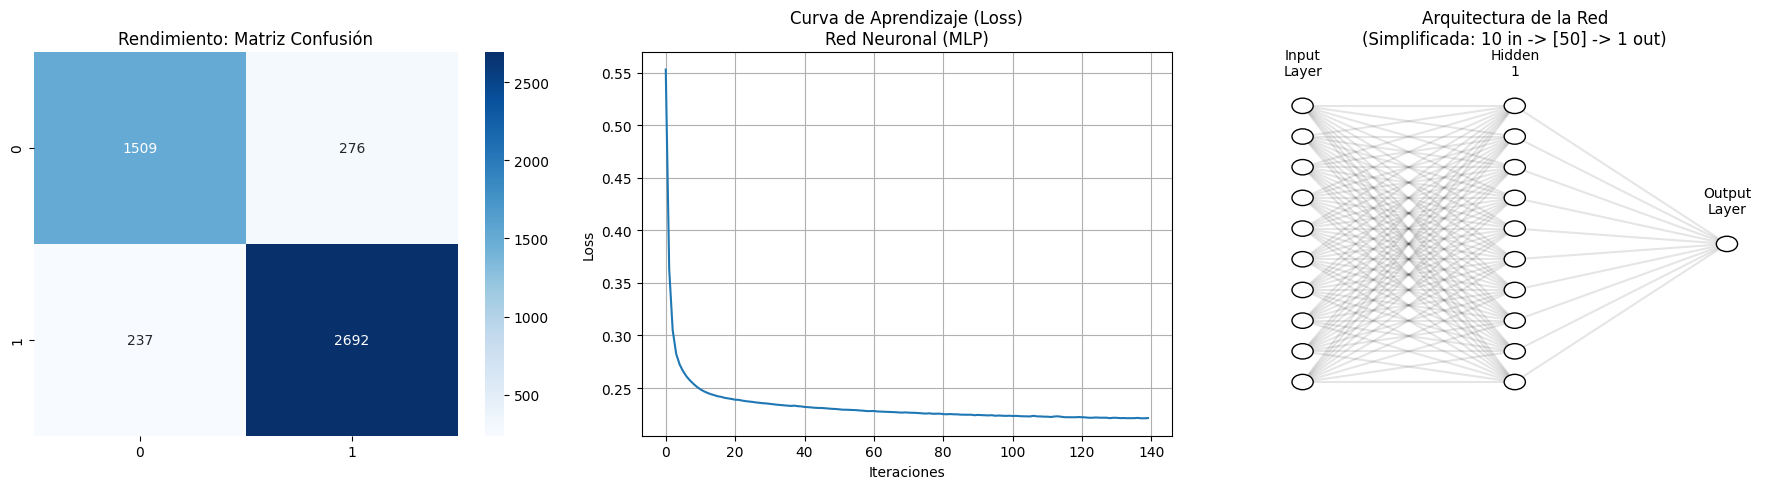


--- DETALLE DE PESOS (RED NEURONAL) ---
Capa Entrada (10 neuronas) -> Capa Oculta 1 (50 neuronas)
Ejemplo de pesos primeros 5 inputs:
[[-0.17564992 -0.27647188 -0.46364073]
 [ 0.07668309 -0.08140871 -0.07992101]
 [-0.06288315  0.34312064  0.28308191]
 [-0.30077272 -0.05073966  0.10578259]
 [ 0.28650965  0.22910025 -0.04860954]] ...

>>> 2. PROVEEDOR: Visualizando XGBoost
★ GANADOR: XGBoost Extremo
★ CONFIG: Todas las vars | PARAMS: {'n_estimators': 100, 'learning_rate': 0.1}


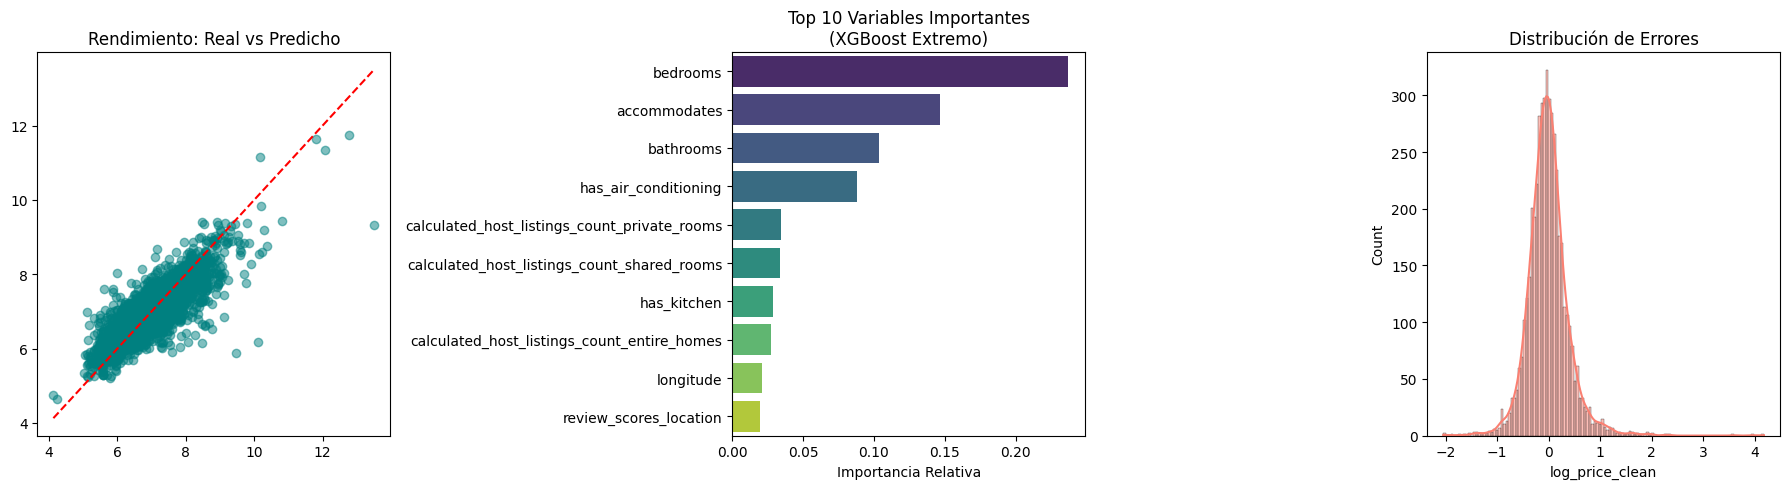


>>> 3. AGENCIA: Visualizando Bosque Aleatorio
★ GANADOR: Bosque Aleatorio
★ CONFIG: Todas las vars | PARAMS: {'n_estimators': 100, 'max_depth': None}


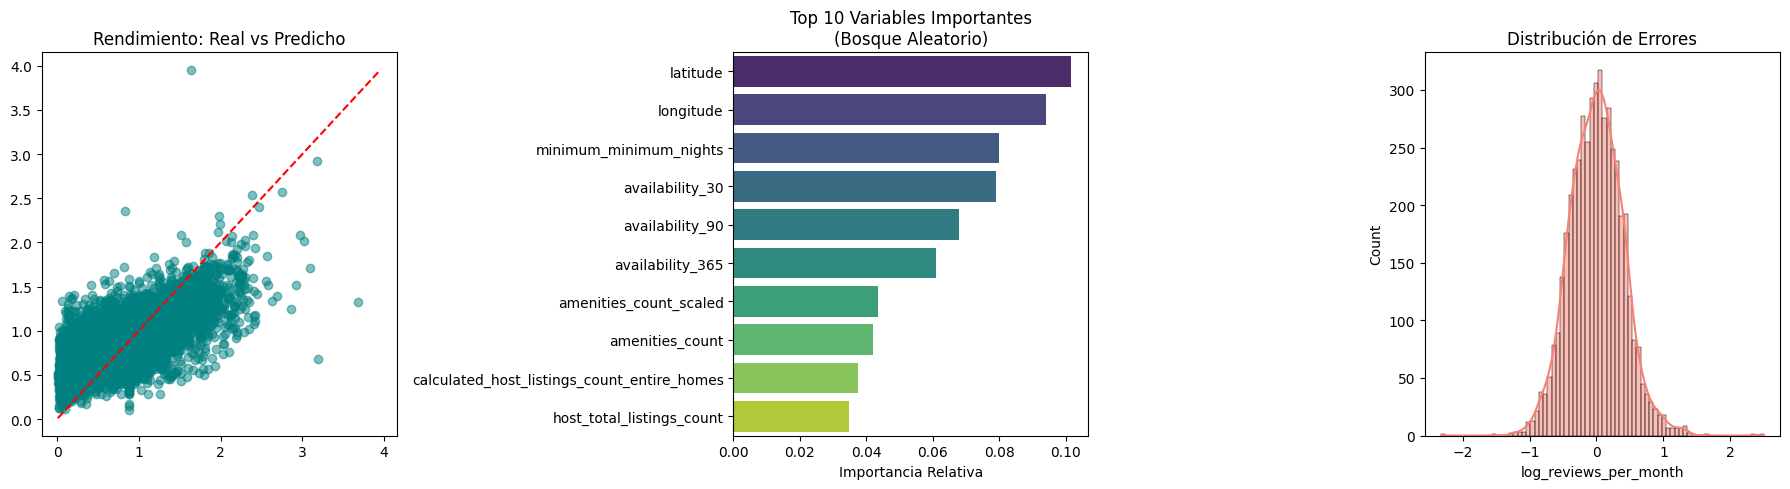

In [ ]:

print("=========================================================")
print("  VISUALIZACIÓN PERSONALIZADA DE MODELOS SELECCIONADOS")
print("=========================================================")


print("\n>>> 1. USUARIO: Visualizando MLP (Preferencia Manual)")


# Buscamos que el nombre contenga 'Neuronal' o 'MLP'
df_mlp = df_user_pure[df_user_pure['Modelo'].str.contains('Neuronal|MLP', case=False)].sort_values(by='Test Score', ascending=False)

if not df_mlp.empty:
    visualizar_modelo_ganador_detallado(df_mlp, X_user_pure, y_user, 'clas')
else:
    print("Error: No se encontró la MLP en la tabla de resultados 'df_user_pure'.")



print("\n>>> 2. PROVEEDOR: Visualizando XGBoost")


df_xgb = df_prov_pure[df_prov_pure['Modelo'].str.contains('XGB', case=False)].sort_values(by='Test Score', ascending=False)

if not df_xgb.empty:
    visualizar_modelo_ganador_detallado(df_xgb, X_prov_pure, y_prov, 'reg')
else:
    print("Error: No se encontró XGBoost en la tabla de resultados 'df_prov_pure'.")



print("\n>>> 3. AGENCIA: Visualizando Bosque Aleatorio")


df_rf = df_agency_pure[df_agency_pure['Modelo'].str.contains('Bosque|Random', case=False)].sort_values(by='Test Score', ascending=False)

if not df_rf.empty:
    visualizar_modelo_ganador_detallado(df_rf, X_agency_pure, y_agency, 'reg')
else:
    print("Error: No se encontró Bosque Aleatorio en la tabla de resultados 'df_agency_pure'.")